In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

api = KaggleApi()
api.authenticate()

dataset1 = 'chiticariucristian/deforestation-and-forest-loss'
dataset2 = 'ulrikthygepedersen/co2-emissions-by-country'

data_dir = '../data'
response_csv = api.dataset_download_files(dataset1, path=data_dir, unzip=True)
response_csv = api.dataset_download_files(dataset2, path=data_dir, unzip=True)
print("CSV files downloaded and unzipped successfully. Converting to a database...")
csv_file1 = os.path.join(data_dir, 'annual-change-forest-area.csv')
csv_file2 = os.path.join(data_dir, 'co2_emissions_kt_by_country.csv')

try:
    deforestation_df = pd.read_csv(csv_file1)
    co2_emissions_df = pd.read_csv(csv_file2)
except Exception as e:
    print(f"Error occured: {e}")



Dataset URL: https://www.kaggle.com/datasets/chiticariucristian/deforestation-and-forest-loss
Dataset URL: https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country
CSV files downloaded and unzipped successfully. Converting to a database...


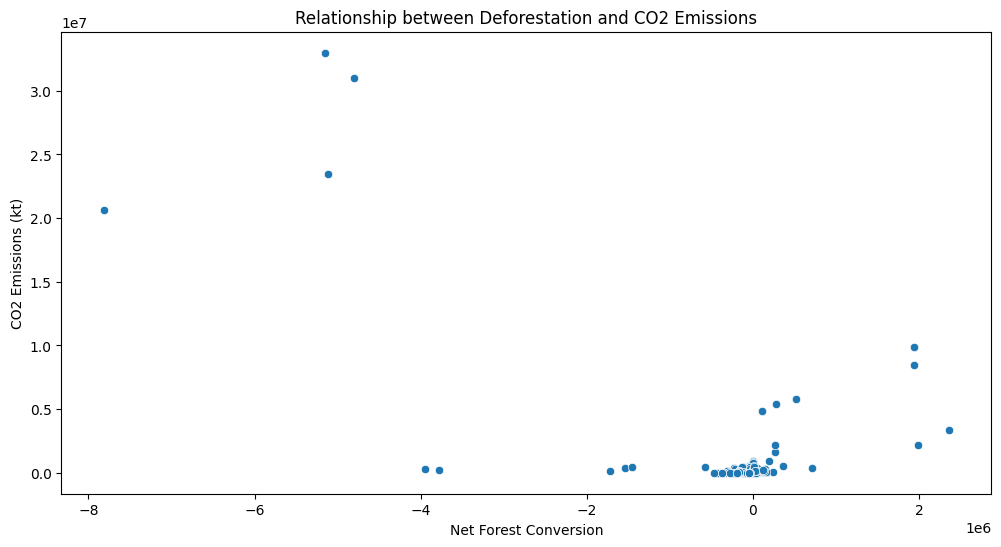

-0.6761613292027124

In [2]:
# Data cleaning and transformation
# Renaming the columns correctly based on the actual column names
co2_emissions_df.rename(columns={"country_name": "Country", "year": "Year", "value": "CO2 Emissions (kt)"}, inplace=True)
deforestation_df.rename(columns={"Entity": "Country"}, inplace=True)

# Filter the data to include only the necessary columns
deforestation_df = deforestation_df[["Country", "Year", "Net forest conversion"]]

co2_emissions_df = co2_emissions_df[["Country", "Year", "CO2 Emissions (kt)"]]

# Merge the datasets on Country and Year
merged_df = pd.merge(deforestation_df, co2_emissions_df, on=["Country", "Year"], how="inner")

# Visualize the relationship between deforestation and CO2 emissions
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x="Net forest conversion", y="CO2 Emissions (kt)")
plt.title("Relationship between Deforestation and CO2 Emissions")
plt.xlabel("Net Forest Conversion")
plt.ylabel("CO2 Emissions (kt)")
plt.show()

# Calculate the correlation between deforestation and CO2 emissions
correlation = merged_df["Net forest conversion"].corr(merged_df["CO2 Emissions (kt)"])
display(correlation)